In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [30]:
df =  pd.read_csv('Retail_Prices_of _Products.csv')
df.head()

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM
0,2017,January,Province 1,Meat & Poultry,"Beef stewing cuts, per kilogram",12.66,No,11.0,12.66,Essential,11.10,Dollars
1,2017,January,Province 1,Meat & Poultry,"Beef striploin cuts, per kilogram",21.94,No,11.0,21.94,Essential,11.20,Dollars
2,2017,January,Province 1,Meat & Poultry,"Beef top sirloin cuts, per kilogram",13.44,No,11.0,13.44,Essential,11.30,Dollars
3,2017,January,Province 1,Meat & Poultry,"Beef rib cuts, per kilogram",20.17,No,11.0,20.17,Essential,11.41,Dollars
4,2017,January,Province 1,Meat & Poultry,"Ground beef, per kilogram",9.12,No,11.0,9.12,Essential,11.40,Dollars


In [31]:
df.isna().sum()

Year                0
Month               0
GEO                 0
Product Category    0
Products            0
VALUE               0
Taxable             0
Total tax rate      0
Value after tax     0
Essential           0
COORDINATE          0
UOM                 0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  object 
 2   GEO               118482 non-null  object 
 3   Product Category  118482 non-null  object 
 4   Products          118482 non-null  object 
 5   VALUE             118482 non-null  float64
 6   Taxable           118482 non-null  object 
 7   Total tax rate    118482 non-null  float64
 8   Value after tax   118482 non-null  float64
 9   Essential         118482 non-null  object 
 10  COORDINATE        118482 non-null  float64
 11  UOM               118482 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 10.8+ MB


In [33]:
#Change year int data type to datet
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.describe()

,Year,VALUE,Total tax rate,Value after tax,COORDINATE
count,118482,118482.000000,118482.000000,118482.000000,118482.000000
mean,2020-08-04 13:13:28.163265280,5.437324,12.632134,5.515499,6.501741
min,2017-01-01 00:00:00,0.300000,5.000000,0.300000,1.100000
25%,2019-01-01 00:00:00,2.850000,11.000000,2.910000,3.750000
50%,2021-01-01 00:00:00,3.990000,13.000000,4.050000,6.500000
75%,2023-01-01 00:00:00,5.810000,15.000000,5.947500,9.240000
max,2025-01-01 00:00:00,48.450000,15.000000,48.450000,11.990000
std,NaN,5.192748,2.899124,5.215311,3.172173


In [36]:
categorical_cols = ['Month', 'GEO', 'Product Category', 'Products', 'Taxable', 'Essential', 'UOM']

for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())


Month: 12 unique values
Month
January      10881
February     10881
March         9672
April         9672
May           9672
June          9672
July          9672
August        9672
September     9672
October       9672
November      9672
December      9672
Name: count, dtype: int64

GEO: 11 unique values
GEO
Province 1     10780
Province 3     10780
Province 4     10780
Province 8     10780
Province 5     10780
Province 6     10780
Province 7     10780
Province 10    10780
Province 9     10780
Province 11    10780
Province 2     10682
Name: count, dtype: int64

Product Category: 14 unique values
Product Category
Vegetables                22638
Meat & Poultry            20482
Fruits                    15092
Dairy & Eggs              11760
Grains & Bakery           10780
Canned & Jarred Goods     10780
Cooking Essentials         6468
Frozen Foods               4312
Toiletries & Cleaning      4312
Nuts & Snacks              3234
Legumes & Dry Goods        3234
Beverages                 

In [37]:
pip install nbformat --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\nitin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Distribution of Product Prices

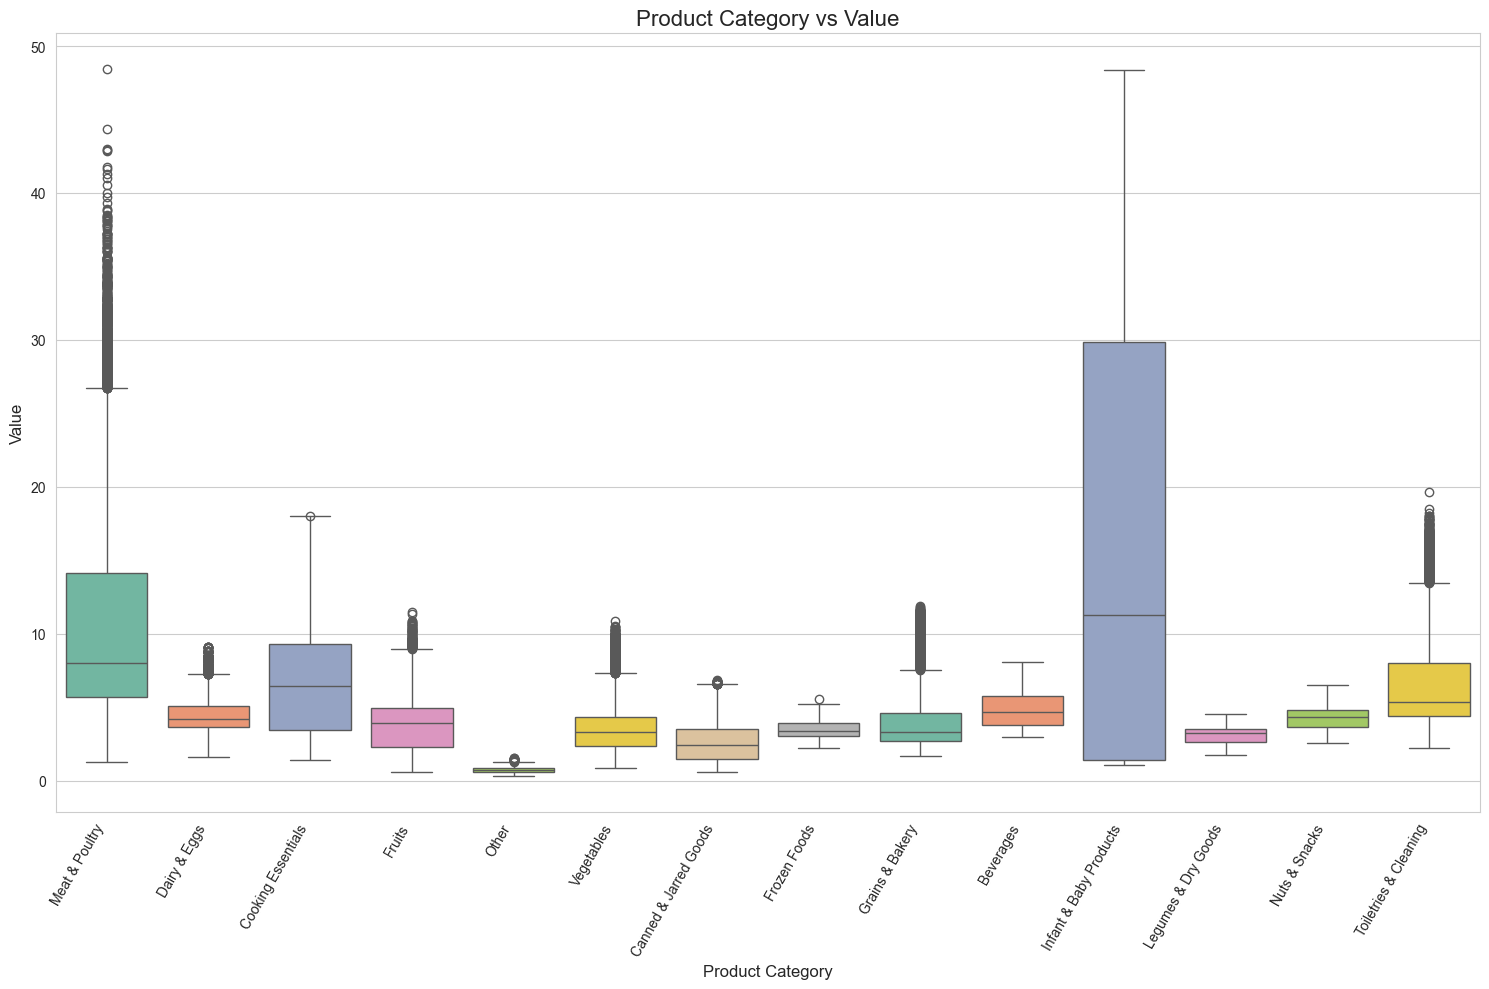

In [38]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Product Category", y="VALUE", data=df, palette="Set2", hue="Product Category")


plt.xticks(rotation=60, ha='right')


plt.title("Product Category vs Value", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Value", fontsize=12)


plt.tight_layout()

plt.show()


In [39]:
df

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM
0,2017-01-01,January,Province 1,Meat & Poultry,"Beef stewing cuts, per kilogram",12.66,No,11.0,12.66,Essential,11.100,Dollars
1,2017-01-01,January,Province 1,Meat & Poultry,"Beef striploin cuts, per kilogram",21.94,No,11.0,21.94,Essential,11.200,Dollars
2,2017-01-01,January,Province 1,Meat & Poultry,"Beef top sirloin cuts, per kilogram",13.44,No,11.0,13.44,Essential,11.300,Dollars
3,2017-01-01,January,Province 1,Meat & Poultry,"Beef rib cuts, per kilogram",20.17,No,11.0,20.17,Essential,11.410,Dollars
4,2017-01-01,January,Province 1,Meat & Poultry,"Ground beef, per kilogram",9.12,No,11.0,9.12,Essential,11.400,Dollars
...,...,...,...,...,...,...,...,...,...,...,...,...
118477,2025-01-01,February,Province 11,Nuts & Snacks,"Sunflower seeds, 400 grams",4.50,No,12.0,4.50,Non-Essential,10.109,Dollars
118478,2025-01-01,February,Province 11,Toiletries & Cleaning,"Deodorant, 85 grams",8.07,Yes,12.0,9.04,Essential,10.750,Dollars
118479,2025-01-01,February,Province 11,Toiletries & Cleaning,"Toothpaste, 100 millilitres",4.13,Yes,12.0,4.63,Essential,10.760,Dollars
118480,2025-01-01,February,Province 11,Toiletries & Cleaning,"Shampoo, 400 millilitres",7.18,Yes,12.0,8.04,Essential,10.770,Dollars


## Distribution of Taxes by Provinces

In [40]:
df

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM
0,2017-01-01,January,Province 1,Meat & Poultry,"Beef stewing cuts, per kilogram",12.66,No,11.0,12.66,Essential,11.100,Dollars
1,2017-01-01,January,Province 1,Meat & Poultry,"Beef striploin cuts, per kilogram",21.94,No,11.0,21.94,Essential,11.200,Dollars
2,2017-01-01,January,Province 1,Meat & Poultry,"Beef top sirloin cuts, per kilogram",13.44,No,11.0,13.44,Essential,11.300,Dollars
3,2017-01-01,January,Province 1,Meat & Poultry,"Beef rib cuts, per kilogram",20.17,No,11.0,20.17,Essential,11.410,Dollars
4,2017-01-01,January,Province 1,Meat & Poultry,"Ground beef, per kilogram",9.12,No,11.0,9.12,Essential,11.400,Dollars
...,...,...,...,...,...,...,...,...,...,...,...,...
118477,2025-01-01,February,Province 11,Nuts & Snacks,"Sunflower seeds, 400 grams",4.50,No,12.0,4.50,Non-Essential,10.109,Dollars
118478,2025-01-01,February,Province 11,Toiletries & Cleaning,"Deodorant, 85 grams",8.07,Yes,12.0,9.04,Essential,10.750,Dollars
118479,2025-01-01,February,Province 11,Toiletries & Cleaning,"Toothpaste, 100 millilitres",4.13,Yes,12.0,4.63,Essential,10.760,Dollars
118480,2025-01-01,February,Province 11,Toiletries & Cleaning,"Shampoo, 400 millilitres",7.18,Yes,12.0,8.04,Essential,10.770,Dollars


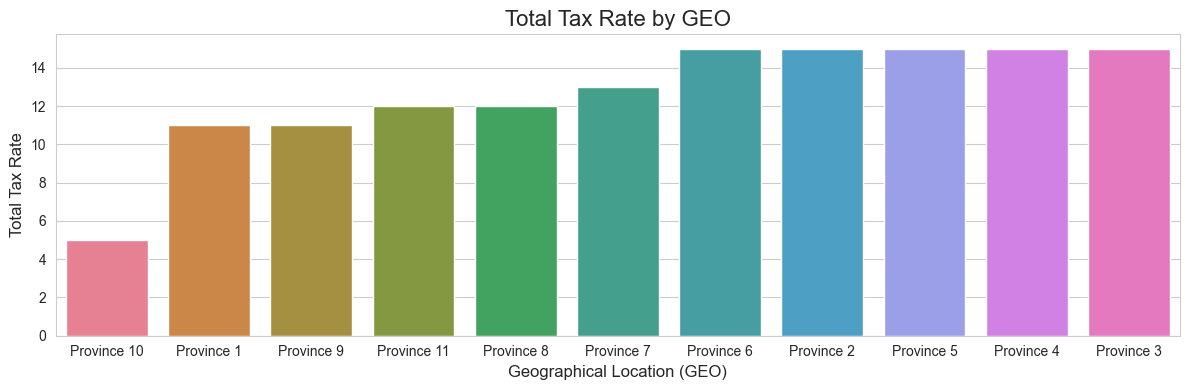

In [41]:
plt.figure(figsize=(12, 4))
sns.barplot(x='GEO', y="Total tax rate", data=df.sort_values("Total tax rate"), hue='GEO')
plt.title('Total Tax Rate by GEO', fontsize=16)
plt.xlabel('Geographical Location (GEO)', fontsize=12)
plt.ylabel('Total Tax Rate', fontsize=12)
plt.tight_layout()
plt.show()


## Average Price Trends Over Time (Yearly)

In [42]:
average_price = df.groupby('Year')['VALUE'].mean().reset_index()

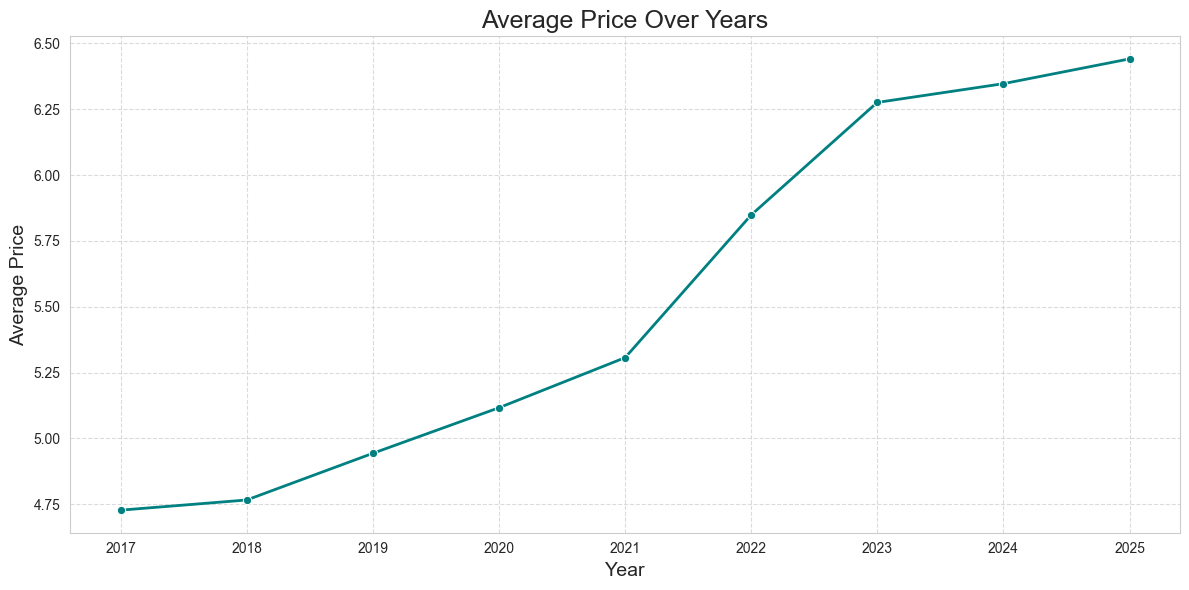

In [43]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='VALUE', data=average_price, marker='o', color='teal', linewidth=2)
        
plt.title('Average Price Over Years', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


## Post-Tax vs Pre-Tax Price Comparison for Essentials & Non-Essentials

In [44]:
essential_melt = df.melt(id_vars=["Essential"], value_vars=["VALUE","Value after tax"], var_name="Price Type", value_name="Price")

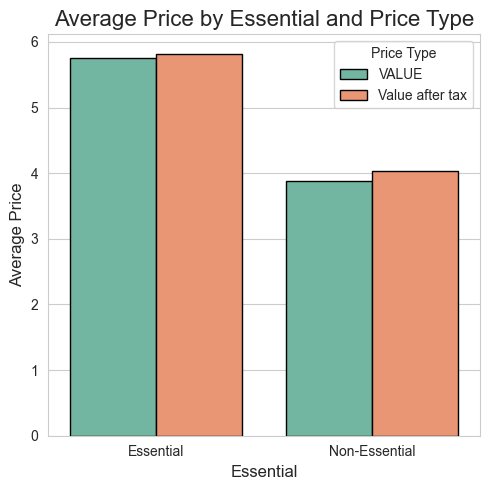

In [58]:

plt.figure(figsize=(5, 5))
sns.barplot(x="Essential", y="Price", hue="Price Type", data=essential_melt, palette="Set2", ci=None,edgecolor="black")
plt.title("Average Price by Essential and Price Type", fontsize=16)
plt.xlabel("Essential", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.legend(title="Price Type")
plt.tight_layout()
plt.show()


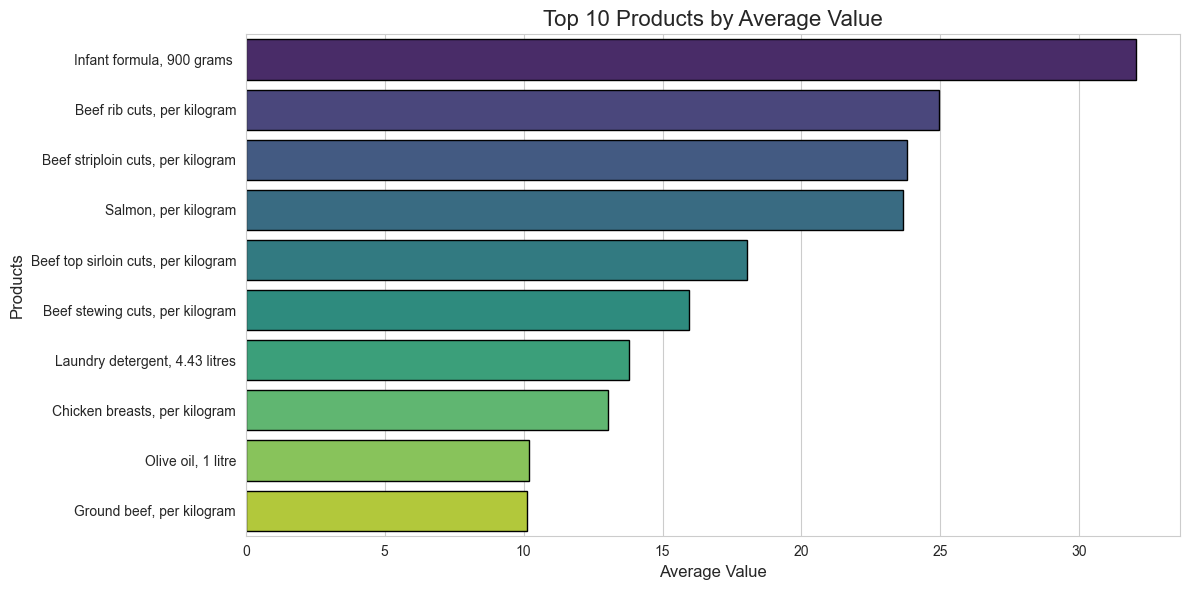

In [57]:
top_10 = df.groupby("Products")["VALUE"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette="viridis", edgecolor="black")
plt.title("Top 10 Products by Average Value", fontsize=16)
plt.xlabel("Average Value", fontsize=12)
plt.ylabel("Products", fontsize=12)
plt.tight_layout()
plt.show()


## Category-wise Price Trends Over 

In [59]:
df

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM
0,2017-01-01,January,Province 1,Meat & Poultry,"Beef stewing cuts, per kilogram",12.66,No,11.0,12.66,Essential,11.100,Dollars
1,2017-01-01,January,Province 1,Meat & Poultry,"Beef striploin cuts, per kilogram",21.94,No,11.0,21.94,Essential,11.200,Dollars
2,2017-01-01,January,Province 1,Meat & Poultry,"Beef top sirloin cuts, per kilogram",13.44,No,11.0,13.44,Essential,11.300,Dollars
3,2017-01-01,January,Province 1,Meat & Poultry,"Beef rib cuts, per kilogram",20.17,No,11.0,20.17,Essential,11.410,Dollars
4,2017-01-01,January,Province 1,Meat & Poultry,"Ground beef, per kilogram",9.12,No,11.0,9.12,Essential,11.400,Dollars
...,...,...,...,...,...,...,...,...,...,...,...,...
118477,2025-01-01,February,Province 11,Nuts & Snacks,"Sunflower seeds, 400 grams",4.50,No,12.0,4.50,Non-Essential,10.109,Dollars
118478,2025-01-01,February,Province 11,Toiletries & Cleaning,"Deodorant, 85 grams",8.07,Yes,12.0,9.04,Essential,10.750,Dollars
118479,2025-01-01,February,Province 11,Toiletries & Cleaning,"Toothpaste, 100 millilitres",4.13,Yes,12.0,4.63,Essential,10.760,Dollars
118480,2025-01-01,February,Province 11,Toiletries & Cleaning,"Shampoo, 400 millilitres",7.18,Yes,12.0,8.04,Essential,10.770,Dollars


In [61]:
df.groupby(["Year","Product Category"])["VALUE"].mean().reset_index()

,Year,Product Category,VALUE
0,2017-01-01,Beverages,4.311553
1,2017-01-01,Canned & Jarred Goods,2.289409
2,2017-01-01,Cooking Essentials,5.744823
3,2017-01-01,Dairy & Eggs,3.945465
4,2017-01-01,Frozen Foods,3.212008
...,...,...,...
121,2025-01-01,Meat & Poultry,12.620526
122,2025-01-01,Nuts & Snacks,4.499394
123,2025-01-01,Other,0.890909
124,2025-01-01,Toiletries & Cleaning,7.980795
